## 1. Import related packages

In [1]:
%matplotlib inline
import time
import keras
import warnings
import numpy as np  
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.optimizers import Adam
from keras.layers import Input, Dense
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize
from sklearn import metrics
from keras.models import Sequential, Model

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score

Using TensorFlow backend.


 ## 2. Road data

In [2]:
warnings.filterwarnings("ignore")
x =[]
dataset = pd.read_csv('test.csv') # to import the dataset into a variable
# print(dataset)
m = [[2.01680882e+03, 0.00000000e+00, 4.70000000e+01, 4.50000000e+01, 1.23091491e-01, 2.74653072e-01]]

m=np.array(m)



# Splitting the attributes into independent and dependent attributes
X = dataset.iloc[:, 0:-1].values # attributes to determine dependent variable / Class
X= np.append(m,X,axis=0)
# print(XX)
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
print(X)
mm = X[0]
mm = [mm.tolist()]
mm=np.array(mm)
print(mm)
XX = np.delete(X, 0, 0)
print(XX)
Y = dataset.iloc[:, -1].values # dependent variable / Class

data_train, data_test, label_train, label_test = train_test_split(XX, Y, test_size=0.1, random_state=0)

FileNotFoundError: File b'test.csv' does not exist

## 3. Handling of Missing Data

In [9]:
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
# imputer = imputer.fit(X[:, 0:])
# X[:, 0:] = imputer.transform(X[:, 0:])

## 4. Data normalization(New)

In [ ]:
def autoNorm(dataSet):
    minVals = dataSet.min(0) # 取每一列的最小值
    maxVals = dataSet.max(0) # 取每一列的最大值
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet/np.tile(ranges, (m, 1))   
    return normDataSet

XautoNorm(X)

## 5. Methods of dimensionality reduction

### 5.1 PCA data dimensionality reduction

In [3]:
def pca_reduction(data_train,data_test,percentage):
    new_data_train = data_train
    new_data_test = data_test
    new_pca = PCA(percentage)
    new_data_train = new_pca.fit_transform(new_data_train)
    new_data_test = new_pca.transform(new_data_test)
    return new_data_train, new_data_test

In [4]:
def two_d_pca(): # show 2d of pca
    feat_cols = [ 'pixel'+str(i) for i in range(data_train.shape[1]) ]
    df = pd.DataFrame(data_train,columns=feat_cols)
    df['y'] = label_train
    rndperm = np.random.permutation(df.shape[0])

    New_Pca = PCA(n_components=2)
    new_pca_result = New_Pca.fit_transform(data_train)
#     print(new_pca_result)

    df['pca-one'] = new_pca_result[:,0]
    df['pca-two'] = new_pca_result[:,1] 
#     df['pca-three'] = new_pca_result[:,2]
    plt.figure(figsize=(10,6))

    plt.scatter( df['pca-one'],df['pca-two'], c=df['y'])
    plt.xlabel('pca-one',size =14)
    plt.ylabel('pca-two',size =14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 14,
        }
    cb.set_label('Rank',fontdict=font,size = 13) 

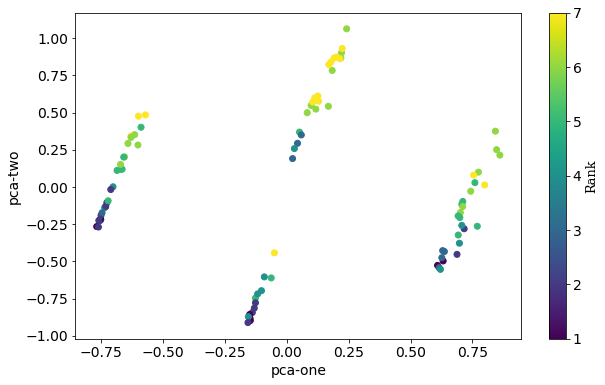

In [5]:
two_d_pca()

### 5.2 SVD data dimensionality reduction

In [5]:
def svd_reduction(train,test,num):
    svd = TruncatedSVD(n_components= num, algorithm='randomized')
    svd_data_train = svd.fit_transform(train)
    svd_data_test = svd.transform(test)
    return svd_data_train,svd_data_test,svd

## 6. Model

### 6.1 KNN and  Cross Validation

In [4]:
def knn_valid(data,label):
    knn_time_start = time.time()
    k_range = range(1,50,1)  
    k_scores = []    
    for k in k_range:  
        knn = KNeighborsClassifier(n_neighbors=k,weights='uniform', algorithm='auto', leaf_size=30, p=2, metric_params=None, n_jobs=5)  
        scores = cross_val_score(knn, data, label, cv=10, scoring='accuracy')  
        k_scores.append(scores.mean())  
    print('validation done! Time elapsed: {:.6f} seconds'.format(time.time()-knn_time_start))

    plt.plot(k_range,k_scores)
    plt.title("KNN Classifier")
    plt.xlabel('Value of K for KNN')  
    plt.ylabel('Cross-Validated Accuracy')  
    plt.show()  
    return  k_scores

### 6.2 Logistic Regression and Cross Validation

In [3]:
def lr_c_valid(data_train,label_train):
    lr_time_start = time.time()
    c_range = range(1,50,1)  
    c_scores = []    
    for c in c_range:  
        logisticRegr = LogisticRegression(multi_class='auto',solver='lbfgs',C=c, n_jobs=2)  
        lr_scores = cross_val_score(logisticRegr, data_train, label_train, cv=10, scoring='accuracy')  
        c_scores.append(lr_scores.mean())  
    print('validation of LR done! Time elapsed: {:.6f} seconds'.format(time.time()-lr_time_start))

    plt.plot(c_range, c_scores)
    plt.title("LR Classifier")
    plt.xlabel('Value of C for RL')  
    plt.ylabel('Cross-Validated Accuracy')  
    plt.show()  
      
    return  c_scores

### 6.3 SVC and Cross Validation

In [5]:
def svc_c_valid(data_train,label_train):
    svc_time_start = time.time()
    svc = SVC(kernel='linear')
    C_s = np.logspace(-10, 8, 10)

    scores = list()
    scores_std = list()
    for C in C_s:
        svc.C = C
        this_scores = cross_val_score(svc, data_train, label_train, cv=5, n_jobs=5)
        scores.append(np.mean(this_scores))
        scores_std.append(np.std(this_scores))
    
    print('validation done! Time elapsed: {:.6f} seconds'.format(time.time()- svc_time_start))

    # Do the plotting
    plt.figure()
    plt.semilogx(C_s, scores)
    locs, labels = plt.yticks()
    plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
    plt.title("SVC Classifier")
    plt.ylabel('CV score')
    plt.xlabel('Parameter C')
    plt.ylim(0, 1.1)
    plt.show()
    
    return scores

### 6.4  RandomForest and K-Fold Cross Validation

In [7]:
def randomforest_valid(data_train,label_train):
    RF_time_start = time.time()
    n_estimators_range = range(1,50,10)  
    rf_scores = []    
    for n in n_estimators_range: 
        clf = RandomForestClassifier(
        n_estimators= n,
        criterion='gini',
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features='auto',
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        min_impurity_split=None,
        bootstrap=True,
        oob_score=False,
        n_jobs=-1,
        random_state=0,
        verbose=0,
        warm_start=False,
        class_weight='balanced')
        
        scores = cross_val_score(clf, data_train, label_train, cv=10, scoring='accuracy')  
        rf_scores.append(scores.mean())  
    print('validation done! Time elapsed: {:.6f} seconds'.format(time.time()-RF_time_start))

    plt.plot(n_estimators_range,rf_scores)
    plt.title("RandomForest Classifier")
    plt.xlabel('Number of estimator for RandomForest')  
    plt.ylabel('Cross-Validated Accuracy')  
    plt.show()  
    return  rf_scores

## 6. Data preprocessing

### 6.1 PCA Visualization

In [97]:
pca_time_start = time.time()
pca_data_train,pca_data_test = pca_reduction(data_train,data_test,0.9)
print('PCA done! Time elapsed: {:.6f} seconds'.format(time.time()-pca_time_start))

PCA done! Time elapsed: 0.008976 seconds


### 6.2 SVD Visualization

In [12]:
svd_time_start = time.time()
svd_data_train, svd_data_test,new_svd = svd_reduction(data_train,data_test,1)
print('SVD done! Time elapsed: {:.6f} seconds'.format(time.time()-svd_time_start))

SVD done! Time elapsed: 0.011968 seconds


## 7. testing

### 7.1 KNN and crossValidation

#### 7.1.1 KNN with PCA cross validation

validation done! Time elapsed: 5.167177 seconds


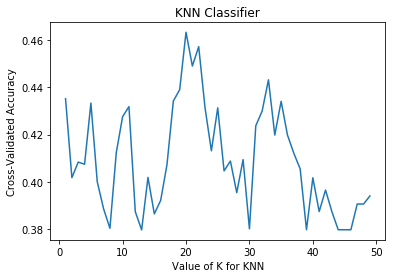

0.4632534132534132 19


In [7]:
k_val_scores = knn_valid(data_train,label_train)
max_score = max(k_val_scores)
best_k = k_val_scores.index(max_score)
print(max_score,best_k)

In [9]:
new_pca_knn = KNeighborsClassifier(n_neighbors=8,weights='uniform', algorithm='auto', leaf_size=10, p=1, metric_params=None, n_jobs=1)
knn_pca_model = new_pca_knn.fit(data_train,label_train)
print("Accuracy:",new_pca_knn.score(data_test,label_test))

Accuracy: 0.5454545454545454


#### 7.1.2 KNN with SVD cross validation

validation done! Time elapsed: 6.542475 seconds


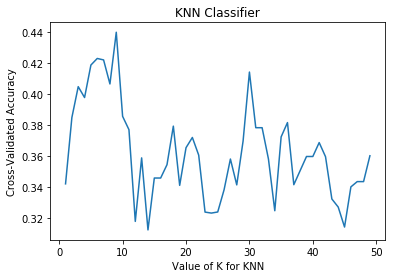

0.4396436896436896 8


In [100]:
svd_score = knn_valid(data_train,label_train)
max_score_svd = max(svd_score)
best_k_svd = svd_score.index(max_score_svd)
print(max_score_svd,best_k_svd)

In [102]:
new_svd_knn = KNeighborsClassifier(n_neighbors=9,weights='uniform', algorithm='auto', leaf_size=30, p=2, metric_params=None, n_jobs=5)
knn_svd_model = new_svd_knn.fit(data_train,label_train)
new_svd_knn.score(data_test,label_test)

0.45454545454545453

### 7.2 LR and crossValidation

validation of LR done! Time elapsed: 16.142331 seconds


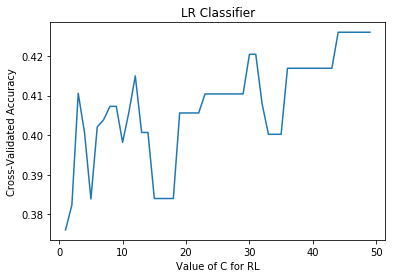

0.42598068598068595 Optimal parameter: 43


In [23]:
lr_val_c_scores = lr_c_valid(data_train,label_train)
max_score = max(lr_val_c_scores)
best_c = lr_val_c_scores.index(max_score)
print(max_score,"Optimal parameter:",best_c)

In [8]:
new_lr = LogisticRegression(C=43)
new_lr.fit(data_train,label_train)
print(new_lr.score(data_test,label_test))

svc_pred = new_lr.predict(mm)
print(svc_pred)

0.8181818181818182
[2]


### 7.4 SVC and crossValidation

validation done! Time elapsed: 16.610180 seconds


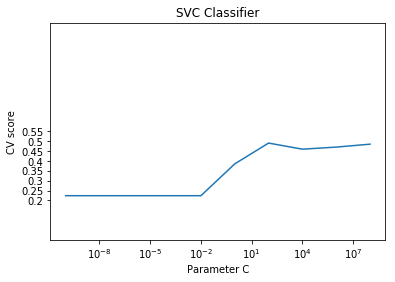

0.4903276947697462 6


In [6]:
svc_val_c_scores = svc_c_valid(data_train,label_train)
svc_max_score = max(svc_val_c_scores)
svc_best_c = svc_val_c_scores.index(svc_max_score)
print(svc_max_score)

In [7]:
new_svc = SVC(kernel='linear',C= 54)
svc_model = new_svc.fit(data_train,label_train)
print("Accuracy:",svc_model.score(data_test,label_test))

Accuracy: 0.8181818181818182


In [13]:
data_test

array([[1.        , 0.        , 0.07017544, 0.01427065, 0.03064844,
        0.11972778],
       [0.81740167, 0.        , 0.00974659, 0.25462214, 0.18815079,
        0.30338288],
       [0.58333333, 0.        , 0.00779727, 0.00717047, 0.        ,
        0.        ],
       [1.        , 0.12658228, 0.01754386, 0.01181019, 0.27342923,
        0.7070079 ],
       [1.        , 0.12658228, 0.89083821, 0.26158172, 0.89960026,
        1.        ],
       [0.91666667, 0.        , 0.03703704, 0.03205624, 0.4019351 ,
        0.3139204 ],
       [0.81740167, 0.        , 0.0214425 , 0.01898067, 0.08238526,
        0.38857108],
       [0.83333333, 0.11392405, 0.53996101, 0.12302285, 0.92619238,
        0.68395744],
       [0.81740167, 0.03797468, 0.01949318, 0.03901582, 0.4074217 ,
        0.67098148],
       [0.66666667, 0.01265823, 0.        , 0.04913884, 0.31272991,
        0.58088075],
       [0.91666667, 0.        , 0.4288499 , 0.03613357, 0.65206721,
        0.69410262]])

### 7.4 RandomForest and crossValidation

validation done! Time elapsed: 6.936406 seconds


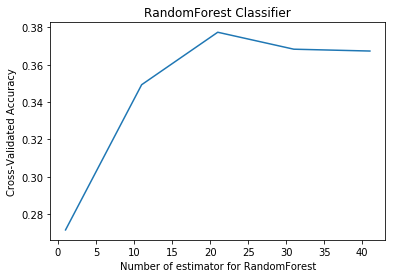

0.37743589743589745 2


In [116]:
rf_val_stimator_scores = randomforest_valid(pca_data_train,label_train)
rf_max_score = max(rf_val_stimator_scores)
rf_best_stimator = rf_val_stimator_scores.index(rf_max_score)
print(rf_max_score,rf_best_stimator)

In [127]:
new_rf = RandomForestClassifier(n_estimators= 22)
rf_model = new_rf.fit(data_train,label_train)
print("Accuracy:",rf_model.score(data_test,label_test))

Accuracy: 0.45454545454545453


## 8 confusion_matrix

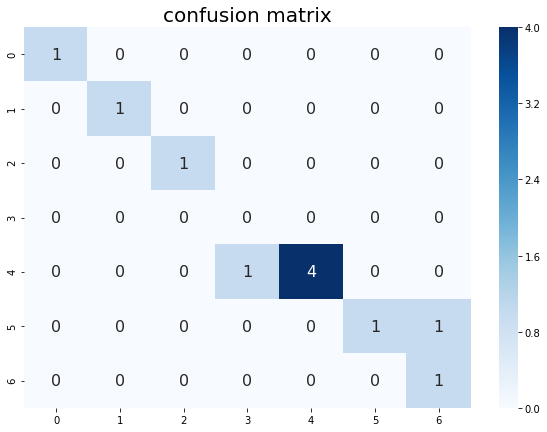

In [15]:
svc_pred = new_svc.predict(data_test)
cm=metrics.confusion_matrix(label_test,svc_pred)

plt.figure(figsize = (10,7))
plt.title('confusion matrix',size =20)
sns.heatmap(cm, annot=True,annot_kws={"size": 16},cmap="Blues")



In [56]:
print(classification_report(label_test,svc_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         0
           5       1.00      0.80      0.89         5
           6       1.00      0.50      0.67         2
           7       0.50      1.00      0.67         1

   micro avg       0.82      0.82      0.82        11
   macro avg       0.79      0.76      0.75        11
weighted avg       0.95      0.82      0.86        11

